Importing Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

Loading and Preparing the Data

In [ ]:
data = {
    "sno": [1, 2, 3, 4, 5, 6],
    "Temperature": [0, 20, 40, 60, 80, 100],
    "Pressure": [0.0002, 0.0012, 0.006, 0.03, 0.09, 0.27]
}

datas = pd.DataFrame(data)
datas.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


Defining Feature and Target Variables

In [ ]:
#  Our feature variable that is X will contain the Column between 1st
#  and the target variable that is y will contain the 2nd column.
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

Fitting the Linear Regression Model

In [ ]:
# We will first fit a simple linear regression model to the data.

lin = LinearRegression()

lin.fit(X, y)

LinearRegression()

Fitting the Polynomial Regression Model

In [ ]:
#  Now we will apply polynomial regression by adding polynomial terms to the feature space.
#  In this example, we use a polynomial of degree 4.
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

How we chose 4 as degree?

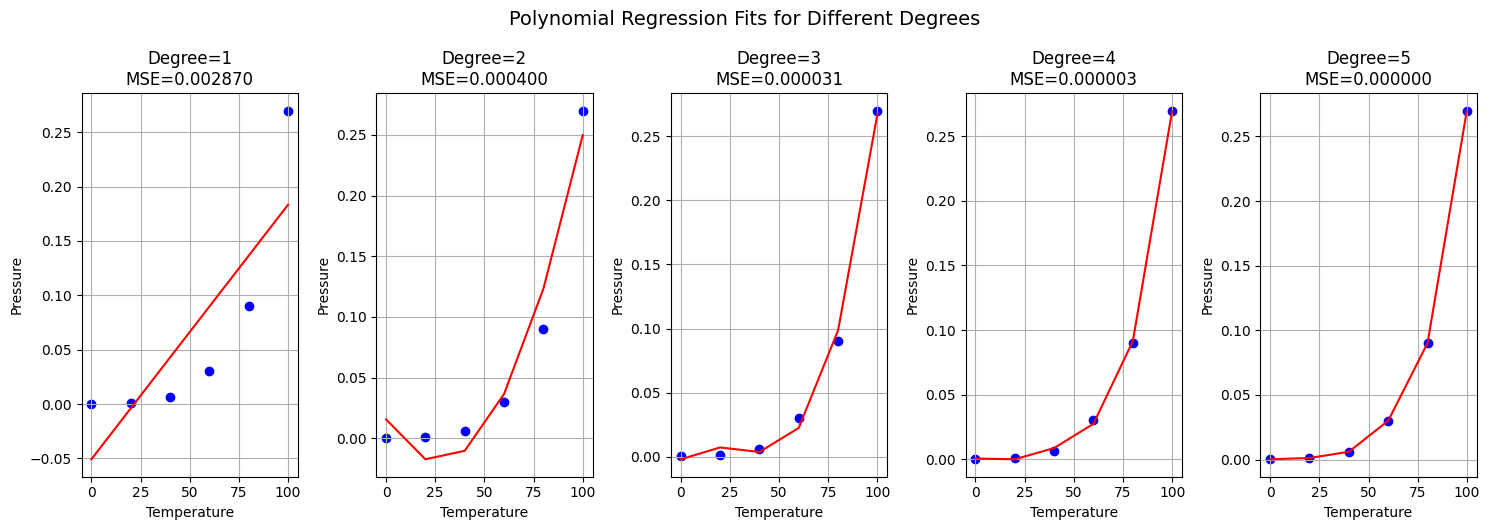

In [ ]:
degrees = [1, 2, 3, 4, 5]
plt.figure(figsize=(15, 5))

for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    # Compute MSE
    mse = mean_squared_error(y, model.predict(X_poly))

    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, model.predict(poly.fit_transform(X)), color='red')
    plt.title(f"Degree={d}\nMSE={mse:.6f}")
    plt.xlabel("Temperature")
    plt.ylabel("Pressure")
    plt.grid(True)
    plt.tight_layout()

plt.suptitle("Polynomial Regression Fits for Different Degrees", fontsize=14, y=1.05)
plt.show()

Visualizing the Linear Regression Results which is degree=1

The relationship between Temperature and Pressure is nonlinear (roughly exponential).

Compare Model Errors (Bias–Variance Visualization)


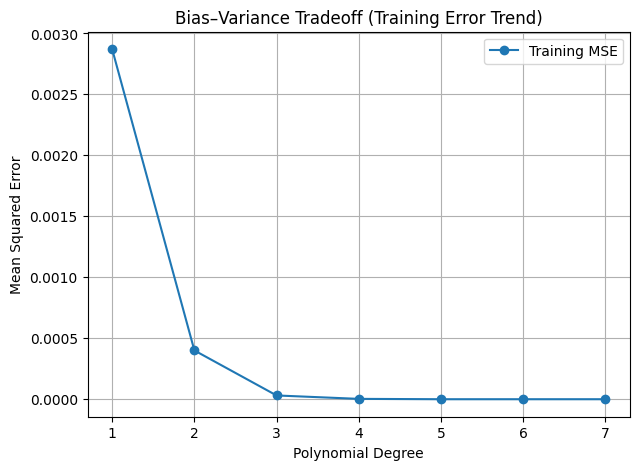

In [ ]:
train_errors = []
for d in range(1, 8):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    mse = mean_squared_error(y, model.predict(X_poly))
    train_errors.append(mse)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 8), train_errors, marker='o', label='Training MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff (Training Error Trend)")
plt.grid(True)
plt.legend()
plt.show()

Linear (degree 1) model underfits.

High-degree (4 – 5) models capture curvature better but may overfit small data.

- As polynomial degree increases, model fits curve more closely.
- Low degree → Underfit (high bias).
- Very high degree → Overfit (wiggly curve, low bias, high variance).
- Ideal degree balances accuracy and smoothness.
- The MSE curve shows how increasing complexity affects fit quality.

**Predict New Results**


In [ ]:
# To predict new values using both linear and polynomial regression we need
# to ensure the input variable is in a 2D array format.

pred = 110.0
predarray = np.array([[pred]])
lin.predict(predarray)

array([0.20675333])

The linear model assumes a constant rate of increase between temperature and pressure.

So it underestimates the pressure at higher temperatures (it can’t capture the curvature).

Even though the last data point at 100°C is 0.27, the model predicts only 0.2067 for 110°C — lower than the trend suggests.



**Conclusion: Linear regression underfits the data — it fails to capture the nonlinear acceleration.**

In [ ]:
pred2 = 110.0
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

array([0.43295877])

The polynomial model includes higher-degree terms like x2,x3,…

It can follow the curved pattern — increasing faster at high temperatures.

Predicting 0.43 at 110°C makes sense because the rate of increase (from 0.09 → 0.27 between 80°C and 100°C) is steep.



**Conclusion: Polynomial regression captures nonlinear growth, providing a more realistic extrapolation.**

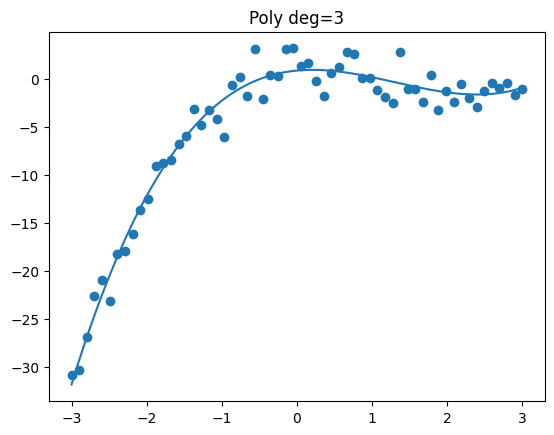

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(0)
X = np.linspace(-3, 3, 60).reshape(-1, 1)
y = 0.5*X[:,0]**3 - 2*X[:,0]**2 + X[:,0] + 1 + rng.normal(0, 1.5, size=X.shape[0])

# degree=3 example
model = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                      StandardScaler(),
                      LinearRegression())
model.fit(X, y)

xx = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
yy = model.predict(xx)

plt.scatter(X, y)
plt.plot(xx, yy)
plt.title("Poly deg=3")
plt.show()

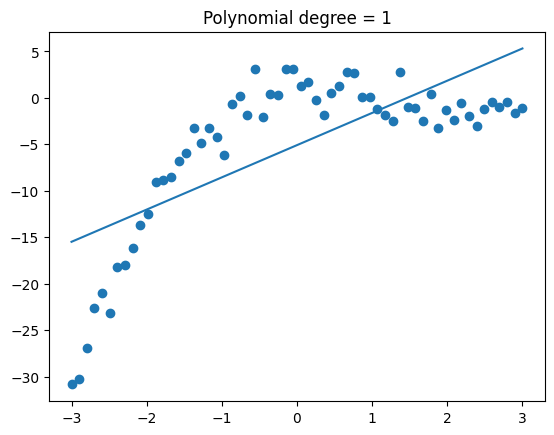

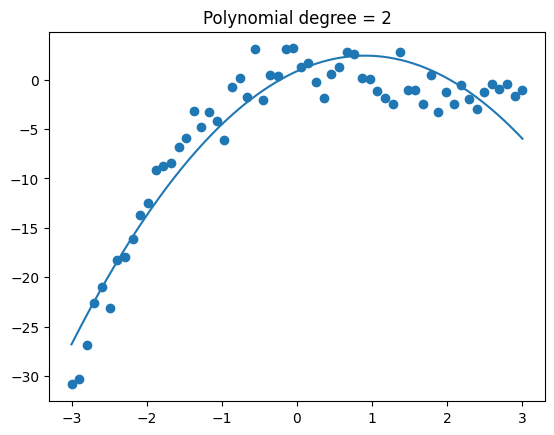

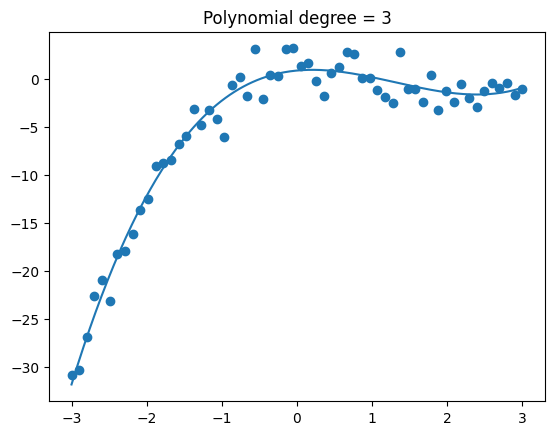

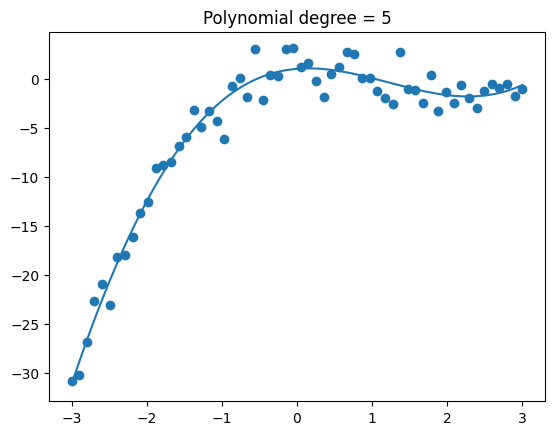

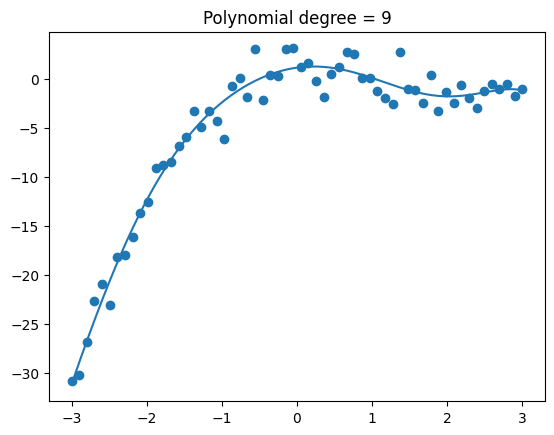

In [ ]:
degrees = [1,2,3,5,9]
xx = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

for d in degrees:
    model = make_pipeline(PolynomialFeatures(d, include_bias=False),
                          StandardScaler(),
                          LinearRegression())
    model.fit(X, y)
    plt.scatter(X, y)
    plt.plot(xx, model.predict(xx))
    plt.title(f"Polynomial degree = {d}")
    plt.show()

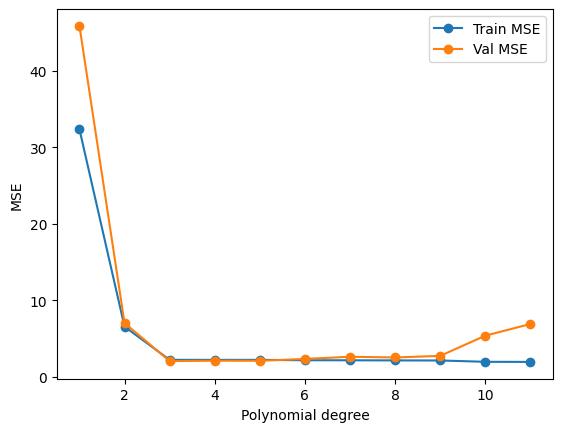

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.3, random_state=42)

deg_list = range(1, 12)
train_mse, val_mse = [], []
for d in deg_list:
    model = make_pipeline(PolynomialFeatures(d, include_bias=False),
                          StandardScaler(),
                          LinearRegression())
    model.fit(Xtr, ytr)
    train_mse.append(mean_squared_error(ytr, model.predict(Xtr)))
    val_mse.append(mean_squared_error(yval, model.predict(Xval)))

plt.plot(deg_list, train_mse, marker='o', label='Train MSE')
plt.plot(deg_list, val_mse, marker='o', label='Val MSE')
plt.xlabel('Polynomial degree'); plt.ylabel('MSE'); plt.legend(); plt.show()

**Best Practices**

Validation curve (just done): pick degree.

Residual plot: structure → underfit; random cloud → good; funnels → heteroscedasticity.

Learning curves: if both train & val errors high → add complexity (reduce bias); if big gap → reduce degree / regularize (reduce variance).

Orthogonal polynomials (Chebyshev/Legendre) mitigate multicollinearity.